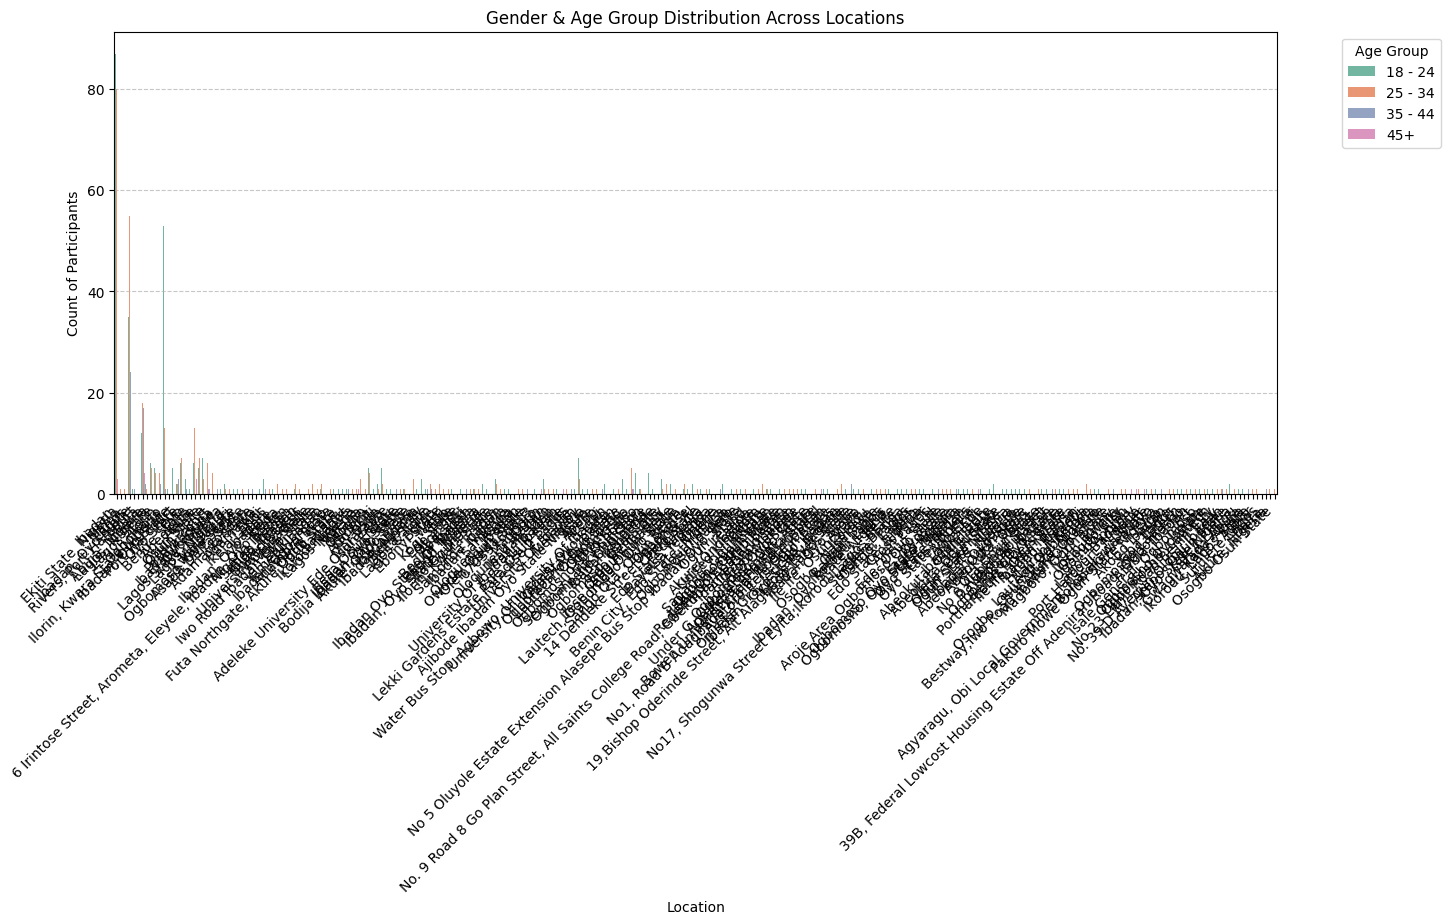

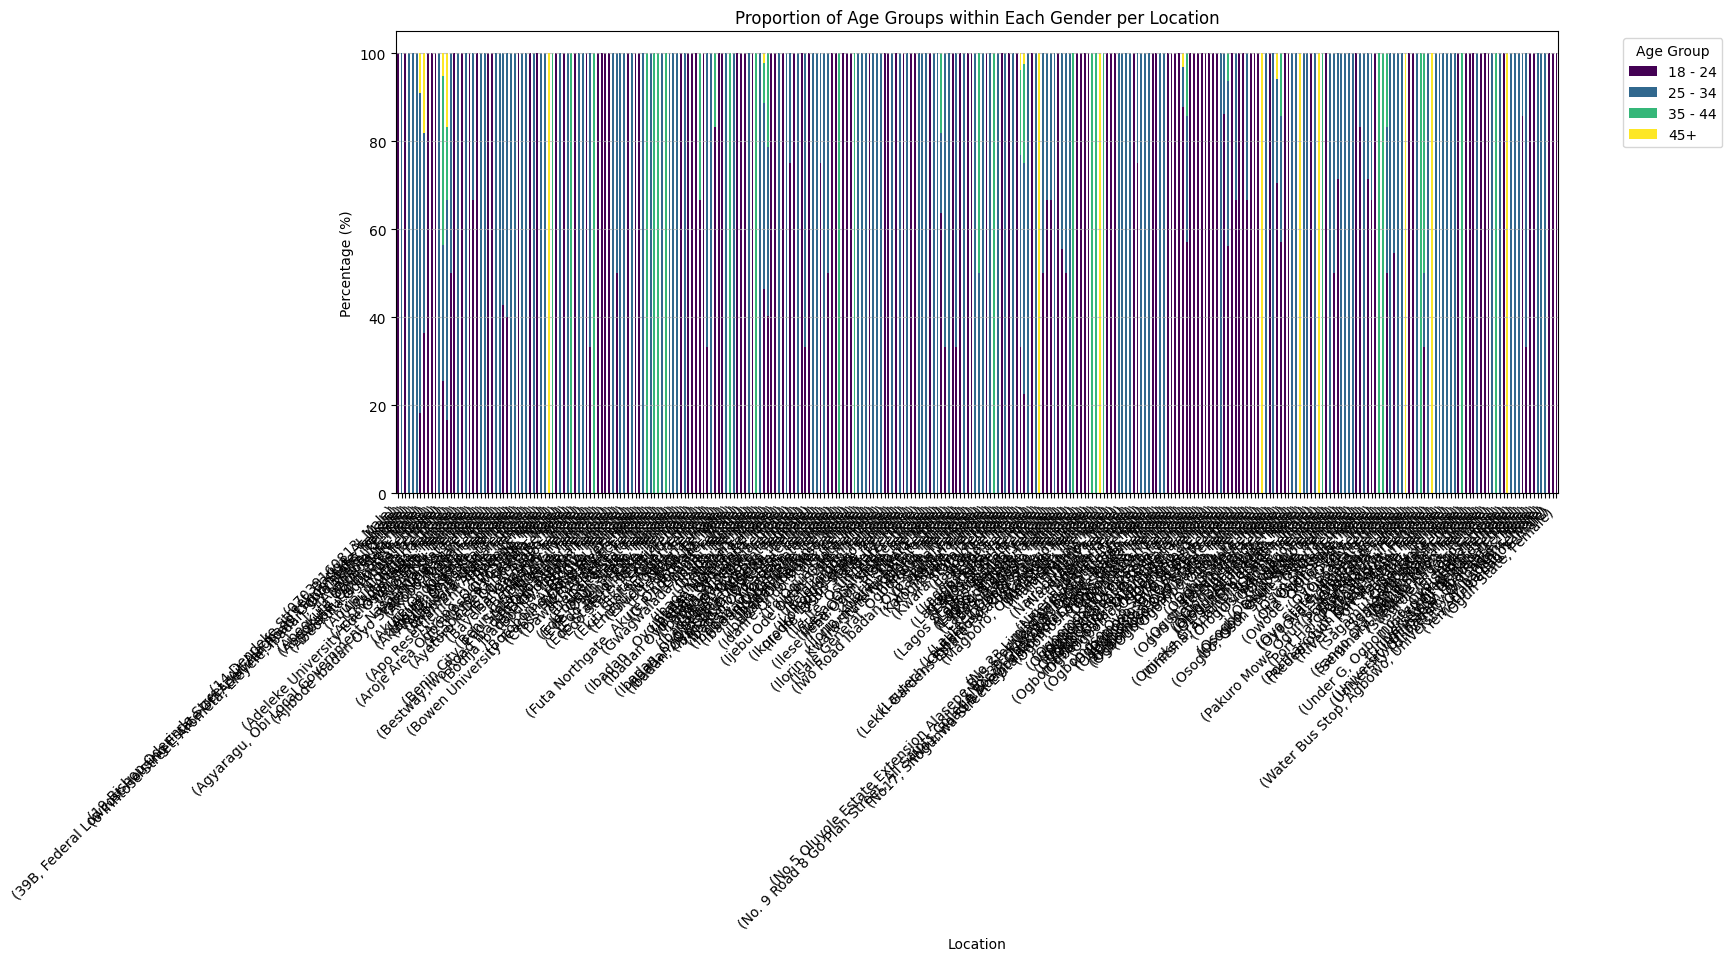

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "UMERA BOOST 2.0 & 3.0.xlsx"
df = pd.read_excel(file_path, sheet_name="UMéRA 3.0")

# Clean column names to remove hidden characters
df.columns = df.columns.str.strip()

# Define column names
gender_col = 'Gender'
age_group_col = 'Age Group'
location_col = 'Location'

# Handle missing values
df[gender_col] = df[gender_col].fillna("Unknown")
df[age_group_col] = df[age_group_col].fillna("Unknown")
df[location_col] = df[location_col].fillna("Unknown")

# Standardize text to avoid duplicate categories (e.g., "Ibadan" vs "IBADAN")
df[location_col] = df[location_col].str.strip().str.title()

# Grouped Bar Chart: Counts of Gender vs. Age Group vs. Location
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x=location_col, hue=age_group_col, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Location")
plt.ylabel("Count of Participants")
plt.title("Gender & Age Group Distribution Across Locations")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a pivot table for stacked bar chart
pivot_table = df.groupby([location_col, gender_col, age_group_col]).size().unstack(fill_value=0)

# Normalize to get proportions
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Stacked Bar Chart: Proportion of Age Groups within Each Gender per Location
pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='viridis')
plt.xlabel("Location")
plt.ylabel("Percentage (%)")
plt.title("Proportion of Age Groups within Each Gender per Location")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
